# Lecture 6: Further Examples of Classifiers

This week we're discussing more classifiers and their applications. 

## Support Vector Machine

The Support Vector Machine is another classification method known for its memory-friendly nature. A good way to think about all these machine learning algorithms we have seen is as a set of tools. Each one has its unique advantages and disadvantages, but these tools can oftentimes be used in conjunction with each other. An SVM is almost like a scalpel; it can navigate through complex relationships in high-dimensions, but is best used on smaller subsets of data.

### Basics

We start by assigning each data point a set of "coordinates" called its features. In this way, we can represent the data in some n-dimensional feature space as a set of points. The basic goal is to find a **hyperplane**, that is, an (n-1)-dimensional plane that best seperates the data points. A **support vector** is the position vector of a point close to this hyperplane of seperation.

![image](http://dni-institute.in/blogs/wp-content/uploads/2015/09/SVM-Planes.png)


Consider a 2-dimensional case. This means that we represented the data in terms of two features. We want to find a separation hyperplane that separates the data points into two sets.

In 2-dimensions, our hyperplane of interest is simply a line of the form $mx + b$. We want to try and tweek $m$ and $b$ to find the best line of seperation.

![image](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png)

It is pretty intuitive to see that in the above case, line B is the best case. The following case is a bit trickier, but still we can find that line C appears to be the best.

![image](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png)

This is because it maximizes the **margin** - the distance between the hyperplane and the closest support vectors.

The support vector machine does this process for us. It finds the best hyperplane to seperate the data points.

![image](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAuSAAAAJDlhYzcwMzhlLTA0MjYtNDEyYS1hMWM4LTE3Zjk5NDlhNzVkMQ.png)



### To Reiterate...

Pros:
* Effective in high dimensions
* Uses a subset of data, thus is memory efficient

Cons:
* Bad on large training sets, due to long training time
* Sensitive to noise

## Example 1: Classifying Iris Species

We will use SVM to predict the iris species. You can read more about the dataset <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">here</a>.

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [2]:
# here we use the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target

In [3]:
# we use .SVC function to make the classification object
model = svm.SVC(kernel='linear', C=1,gamma=1)

# split the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# fit the model to the training data
model.fit(X_train, Y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
# predict on the testing data
model.predict(X_test)

array([1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1])

In [5]:
# test the score of the model
model.score(X_test,Y_test)

0.80000000000000004

## Margins

Given a dataset 

<img src = "http://www.eric-kim.net/eric-kim-net/posts/1/imgs/dataset_linsep.png" width = 500>

How do we separate the blue dots from the red dots? One way is to draw a straight line between the two classes, separating them. However, there are an infinite number of straight lines we can draw from this graph, so which line should we pick? 

One reasonable choice would be the line that gives the largest separation between the two classes. This separation is called the **margin**, and in **maximal margin classifiers**, we want to maximize the margin. In other words, we want to maximize the distance between the hyperplane (a line in our case) and the closest point(s) (filled in in the graph below) in each class.

![image](https://qph.ec.quoracdn.net/main-qimg-312b52d9d056499a3c8893e22f6fee5e)

These points are called **support vectors** and they help us find where our hyperplane lies. 

### Hard Margins
Our hyperplane may not always be perfect, especially when our dataset is not linearly separable. In such cases, we want to introduce the **cost function**: 

$$-log(1-\frac{1}{1+e^{cx}})$$

It looks like an exponential function and the coefficient c will change how fast the value increases. This function dictates how much to penalize support vectors for being mislabled. If the penalty value (namely $c$) is high, then the svm is **hard margin**.

Let's look at specific case. The graph below shows the hyperplane between two classes, blue are red. As you can see, the existence of one (red) outlier drasticaly changes the hyperplane. 

<img src = "http://yaroslavvb.com/upload/save/so-svm.png" width = 250/>

If we were to use a **hard margin** SVM, we would have a high penalty value and the resulting hyperplane would be dictated by that one red outlier. 

### Soft Margins
You might have realized that, in the example above, it is better to allow one outlier to fall on to the wrong side rather than letting that one outlier dictate the position of our hyperplane. We can achieve a "more balanced" hyperplane that lies more or less right in the middle of the two classes, by having a low $c$ value. This is called a **soft margin support vector machine**.

Especially in non-linearly separable datasets, it is generally better to use a soft margin SVM. In this case, we introduce the **hinge loss function**: 

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/53b729df53f32c7fbf933b1b034a8e368037d9b5)

where $y_i$ is either 1 or -1, indicating the class to which $x_i$ belongs, and $w$ is the vector normal to the hyperplane.

<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width = 300>

The regularization constant controls how "soft" the margins are. 

## The Restrictions of Linearity - Introducing Kernels

Having talked about the function of a support vector machine and the methodology behind it, we now move on to a critical limitation of SVMs: **linearity**. See, an SVM is a member of a class of machine learning models known as **linear classifiers**, an entire class of functions which fit lines or hyperplanes to classify data. Herein lies the problem: linear classifiers fit *straight* lines to the data, but quite often the underlying decision boundary between the classes is anything but.

To illustrate why this is such an issue, imagine cluster of points of class A, surrounded by a ring of points of class B. Now, attempt to draw a straight line with a ruler so to separate those to classes. Such a task is nigh impossible. 

<img src = "https://codingmachinelearning.files.wordpress.com/2016/07/capture6.jpg?w=723" width = 500>

However, this doesn't mean that the two classes are inseparable. In fact, we can simply use an oval shape to separate the two classes:

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_10.png" width = 300/>

And here comes the problem, how do we find this oval that separates our two classes? 

One way to resolve this dilemma is to transform the data into a linearly separable dataset, as such:

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png" width = 300/>

Now we can easily find the separating hyperplane! After finding this hyperplane, we can project the data back into its original form, alnong with the now non-linear decision boundary.

As the title of this section may suggest, to achieve this goal we resort to using a class of functions called **kernel functions**. Kernel functions are used internally within the model to compare data points; each kernel function represents a different measure of similiarity, even simulating the similarity of two points in a higher dimensional space than the one they currently occupy. This is important to note, as while the data might not be separatable in their current form, a different perspective may make all the difference.

### Radial Basis Functions

Now, if you recall back to the example given early in the notes, you may remember the keywork "kernel = 'linear'" appearing. This kernel is the vanilla ice cream of kernels - the default flavor, not particularly interesting, but still good to have sometimes.  The problem posed above is, as we've said, not one of those times. Instead we're going to reach for another flavor of kernel function, known as a **Radial Basis Function**.

A radial basis function is actually a class of functions that all have the same property: the value they return relies **only** on radial distance from the origin (*cough* *cough* kinda like the definition of a circle *cough*). Plugging this into our SVM model will cause the decision boundary generated to take on curvature, even circular patterns if the data is just right. Let's take a look at an example of scikit's RBF in action:

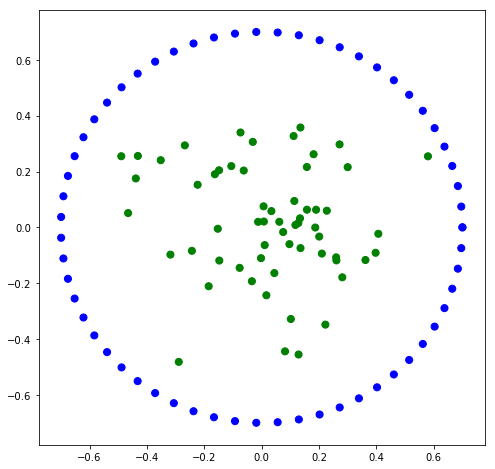

In [6]:
import matplotlib
# Let's generate some data to use
pointsA = np.random.normal(size=(60,2), scale=.2)
theta = np.expand_dims(np.linspace(0,2, 60) * np.pi, axis=1) 
pointsB = np.concatenate([np.cos(theta), np.sin(theta)], axis=1) * .7

data = np.concatenate([pointsA, pointsB], axis=0)
labels = np.zeros(120)
labels[:60] = 0
labels[60:] = 1


colors=["green", "blue"]

plt.figure(figsize=(8,8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=50)

plt.show()

In [7]:
# Let's train two SVMS, one using a linear kernel and one using RBF
clfLIN = svm.SVC(kernel='linear', C=1,gamma=1)
clfRBF = svm.SVC(kernel='rbf', C=1,gamma=1)

clfLIN.fit(data, labels)
clfRBF.fit(data, labels)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

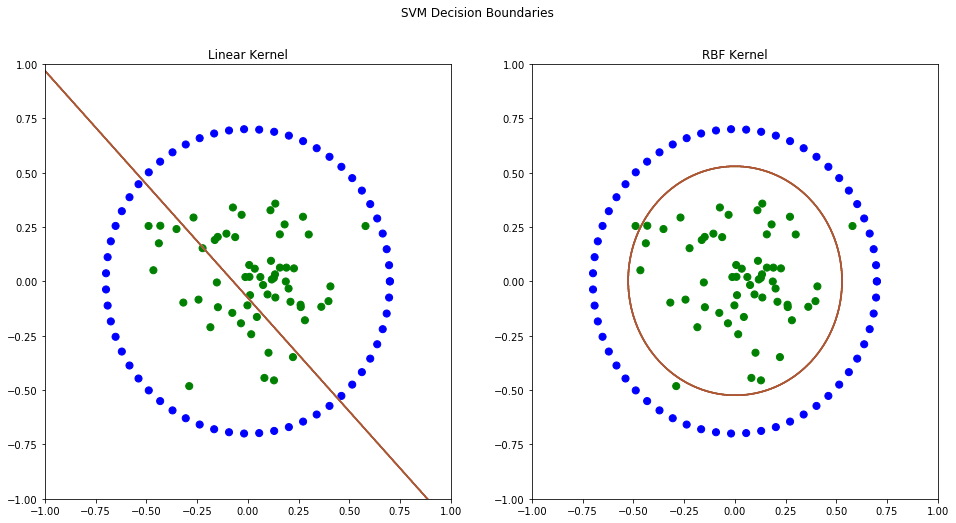

In [8]:
# Now lets plot the decision boundaries generated by both models and see which worked better

# Ignore, drawing decision boundaries is a pain :(
h = .001
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(16,8))
plt.suptitle("SVM Decision Boundaries")

plt.subplot(121)
Z = clfLIN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=50)

plt.title("Linear Kernel")
plt.axis([-1,1,-1,1])

plt.subplot(122)
Z = clfRBF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=50)

plt.title("RBF Kernel")
plt.axis([-1,1,-1,1])

plt.show()

As you can see, the Radial Basis Function kernel was far superior at separating the classes for the non-linear decision boundary. This is an extreme example, of course, where the classes are quite literally oriented in a circle, but RBF would still be the superior choice with any curved decision boundary. However, there is an exception to that statement.

### Polynomial Kernels

The exception mentioned above is simply when the decision boundary could best be modeled by a polynomial curve - in cases like this, the best option is to use the "polynomial" kernel in scikit learn. More on this can be found here: http://scikit-learn.org/stable/modules/svm.html#kernel-functions

## Fitting Parameters - GridSearchCV

We previously talked about two parameters: gamma and C. The question then becomes how to determine these values when training a model. This is especially true because different values can give vastly different models, as seen previously. The manual way to perform parameter fitting would be to iterate over all possible combinations of C and gamma. Luckily, there is a sklearn function for this: GridSearchCV.

Here we will revisit the Iris Species Classification from above:

In [9]:
# import necessary packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, datasets

# here we use the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# here is a hardcoded C and gamma
model = svm.SVC(kernel='linear', C=0.01,gamma=1)
model.fit(X_train, Y_train)
model.predict(X_test)
print("Model score for hard coded parameters: ", model.score(X_test,Y_test))

# give the grid search options to iterate over
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
# create the GridSearch model
grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid)
# fit the model
grid_search.fit(X_train, Y_train)

# we use the grid search parameters
model = svm.SVC(kernel='linear', C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'])
model.fit(X_train, Y_train)
model.predict(X_test)
print("Model score for grid search parameters: ", model.score(X_test,Y_test))

Model score for hard coded parameters:  0.577777777778
Model score for grid search parameters:  0.777777777778


The model performed better with the grid search parameters than with arbitrarily chosen parameters. 

Additionally, the parameter options to iterate over must be given to the grid search. This means that if you give the model more values, you will get more accurate parameters. However, grid search will take longer to run then.